# Customer Churn Prediction

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("churn_prediction.csv")
data.shape

(28382, 21)

In [185]:
data.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0.0,187.000000,2,755,224.000000,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2,310,35,0.0,796.109576,2,3214,60.000000,5390.37,8704.66,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,4,2356,31,0.0,146.000000,2,41,69.997814,3913.16,5815.29,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,5,478,90,0.0,1020.000000,2,582,147.000000,2291.91,2291.91,...,2291.91,1669.79,1,0,1,0,0,0,1,0
4,6,2531,42,2.0,1494.000000,3,388,58.000000,927.72,1401.72,...,1157.15,1677.16,1,0,1,0,0,0,1,0


In [6]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

## Missing value treatment 

In [7]:
data['gender'].mode()[0]

'Male'

In [8]:
data['gender'].fillna(value=(data['gender'].mode()[0]), inplace = True)

In [9]:
data['dependents'].mode()[0]

0.0

In [10]:
data['dependents'].fillna(value=(data['dependents'].mode()[0]), inplace=True)

In [11]:
data['occupation'].mode()

0    self_employed
dtype: object

In [12]:
data['occupation'].fillna(value=(data['occupation'].mode()[0]), inplace=True)

In [13]:
data['city'].fillna(value=data['city'].mean(), inplace=True)

In [14]:
data['days_since_last_transaction'].fillna(value=data['days_since_last_transaction'].mean(), inplace=True)

## Encoding the labels

In [15]:
data= pd.get_dummies(data)

In [16]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                        float64
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
gender_Female                       uint8
gender_Male                         uint8
occupation_company                  uint8
occupation_retired                  uint8
occupation_salaried               

## Segregating Independent and Dependent variables

In [44]:
x = data.drop(['churn'], axis=1)
y = data['churn']
x.shape, y.shape

((28382, 25), (28382,))

In [45]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=101, stratify=y, test_size=0.25)

In [46]:
train_y.value_counts(normalize=True)*100

0    81.466692
1    18.533308
Name: churn, dtype: float64

In [47]:
test_y.value_counts(normalize=True)*100

0    81.468433
1    18.531567
Name: churn, dtype: float64

## Implementing Decision Tree

In [48]:
# Completely improved

In [49]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [50]:
dt_model = DTC(random_state=990, max_depth=6, max_leaf_nodes=30)
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=990, splitter='best')

In [51]:
dt_model.score(train_x, train_y)

0.8652635535093489

In [139]:
dt_score = dt_model.score(test_x, test_y)

In [120]:
pred1 = dt_model.predict(test_x)
accuracy_score(pred1, test_y)

0.8613303269447576

## Implementing Logistic Regression

In [53]:
# Improvement needed

In [54]:
from sklearn.linear_model import LogisticRegression as LR
lr_model = LR()
lr_model.fit(train_x, train_y)

C:\Users\Ankit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Making Prediction Probability 

In [64]:
train_predict = lr_model.predict_proba(train_x)
train_predict[:]

array([[0.76278378, 0.23721622],
       [0.90358144, 0.09641856],
       [0.95213289, 0.04786711],
       ...,
       [0.91810996, 0.08189004],
       [0.66092717, 0.33907283],
       [0.4646658 , 0.5353342 ]])

In [65]:
train_preds = train_predict[:, 1]
train_preds[:]

array([0.23721622, 0.09641856, 0.04786711, ..., 0.08189004, 0.33907283,
       0.5353342 ])

In [84]:
# for i in range(0, len(train_preds)):
#     if train_preds[i] >= 0.45:
#         train_preds[i] = 1
#     else:
#         train_preds[i] = 0

In [89]:
lr_model.score(train_x, train_y)

0.82594193366532

In [140]:
lr_score = lr_model.score(test_x, test_y)

In [119]:
pred2 = lr_model.predict(test_x)
accuracy_score(pred2, test_y)

0.8255355129650507

## Implementing KNN Classifier

In [30]:
# Completely Improved 

In [31]:
from sklearn.neighbors import KNeighborsClassifier as KNN

## Scaling the data

In [32]:
from sklearn.preprocessing import MinMaxScaler as MMS
mms = MMS()
x_scaled = mms.fit_transform(x)
x = pd.DataFrame(x_scaled, columns = x.columns)

In [33]:
knn_model = KNN(n_neighbors=14)

In [34]:
knn_model.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [35]:
knn_model.score(train_x, train_y)

0.854411350183219

In [141]:
knn_score = knn_model.score(test_x, test_y)

In [37]:
def elbow(k):
    test_error = []
    for i in k:
        knn_model = KNN(n_neighbors=i)
        knn_model.fit(train_x, train_y)
        error = 1 - knn_model.score(test_x, test_y)
        test_error.append(error)
    return test_error

In [38]:
k = range(2, 20, 2)

In [39]:
test = elbow(k)

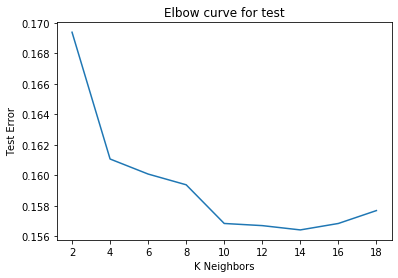

In [40]:
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Error')
plt.title('Elbow curve for test')
plt.show()

In [41]:
# leaf_size = list(range(1,50))
# p=[1,2]#convert to dictionary
# hyperparameters = dict(leaf_size=leaf_size, p=p)#Making model
# clf = GridSearchCV(knn_model, hyperparameters, cv=10)
# best_model = clf.fit(train_x,train_y)

In [43]:
# best_model.best_estimator_

In [118]:
pred3 = knn_model.predict(test_x)
accuracy_score(pred3, test_y)

0.8435738444193912

## Ensembling the models

In [143]:
index_ = [1, 2, 3]
score = [dt_score, lr_score, knn_score]
rank_eval = pd.DataFrame({
    'score': score,
}, index=index_)
rank_eval

,score
1,0.861330
2,0.825536
3,0.843574


In [178]:
sorted_rank = rank_eval.sort_values('score')
sorted_rank['rank'] = [i for i in range(1,6,2)]
sorted_rank

,score,rank
2,0.825536,1
3,0.843574,3
1,0.861330,5


In [179]:
sorted_rank['weight'] = sorted_rank['rank']/sorted_rank['rank'].sum()
sorted_rank

,score,rank,weight
2,0.825536,1,0.111111
3,0.843574,3,0.333333
1,0.861330,5,0.555556


In [180]:
wt_pred1 = pred1*float(sorted_rank.loc[[1],['weight']].values)
wt_pred2 = pred2*float(sorted_rank.loc[[2],['weight']].values)
wt_pred3 = pred3*float(sorted_rank.loc[[3],['weight']].values)
ranked_pred = np.round(wt_pred1 + wt_pred2 + wt_pred3)
ranked_pred

array([0., 1., 1., ..., 0., 0., 0.])

In [181]:
# from statistics import mode,mean
# final_pred = np.array([])
# for i in range(0, len(test_x)):
#     final_pred = np.append(final_pred, mode([pred1[i], pred1[i], pred2[i], pred3[i], pred3[i]]))

In [182]:
from sklearn.metrics import accuracy_score

In [183]:
accuracy = accuracy_score(ranked_pred, test_y)

In [184]:
print(f'Customer Churn Prediction model is {round(accuracy*100, 2)}% accurate.')

Customer Churn Prediction model is 86.13% accurate.
